C:\Users\mckays1\AppData\Local\Temp\ipykernel_11952\2549161921.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


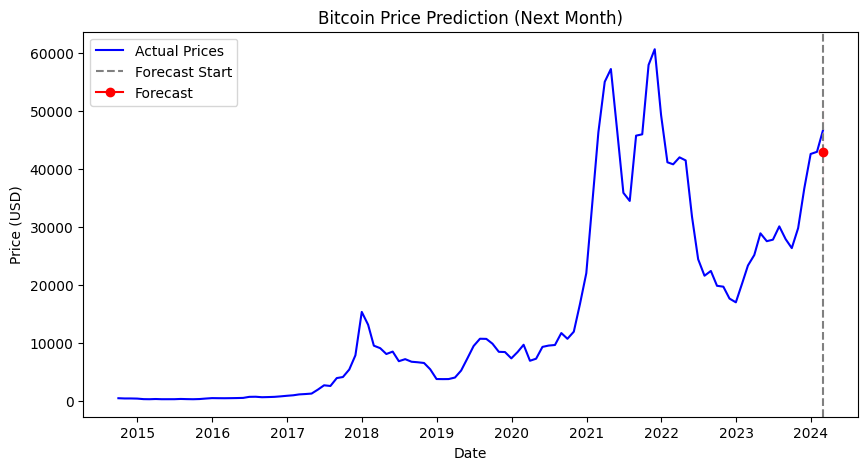

Predicted price for next month: 42925.05241210429


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("data/BTC-USD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to monthly frequency
df_monthly = df['Close'].resample('M').mean()

# Split into train and test
train = df_monthly.iloc[:-1]
test = df_monthly.iloc[-1:]

# Fit SARIMAX model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast next month
forecast = results.get_forecast(steps=1)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Extract forecast values
forecast_index = predicted_mean.index.to_pydatetime()
forecast_values = predicted_mean.values
conf_lower = conf_int.iloc[:, 0].values
conf_upper = conf_int.iloc[:, 1].values

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df_monthly, label="Actual Prices", color="blue")
plt.axvline(test.index[0], color="gray", linestyle="--", label="Forecast Start")
plt.plot(forecast_index, forecast_values, label="Forecast", marker="o", color="red")
plt.fill_between(forecast_index, conf_lower, conf_upper, color="pink", alpha=0.3)
plt.legend()
plt.title("Bitcoin Price Prediction (Next Month)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# Output forecasted price
print(f"Predicted price for next month: {forecast_values[0]}")
